____
### Notas para grupo:
Este notebook precisa dos ficheiro "train_dataset_reduced.csv" e "test_dataset_reduced.csv" resultante da secção "Feature Reduction" da section1.ipynb!
____

# Section 3: Supervised Learning
# 1. Read Datasets

In [1]:
import pandas as pd
import numpy as np

In [9]:
# Read the pre-processed and reduced .csv file for the train dataset
data_train = pd.read_csv("train_dataset_reduced.csv")
data_train.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,Y
0,-18.883186,-32.419895,-25.984499,-27.170945,-8.254103,-5.776573,0.982782,-2.485685,-3.561229,8.203845,...,11.874145,17.828786,0.265993,10.428243,2.542172,3.065818,-10.819577,18.087701,-5.237822,7.693530
1,-17.956624,-32.261849,-26.198370,-6.949561,-15.218213,-6.127422,-14.024204,-4.431317,-3.666016,-3.850515,...,-1.242318,-1.009452,-5.394606,10.160249,2.913603,2.006827,-4.003897,20.003672,-5.326780,7.778053
2,-14.723855,-32.523669,-26.064893,-29.234224,-12.796521,-5.145179,14.705017,-0.323213,-3.637927,2.506266,...,2.515197,-6.600798,-6.517921,9.717316,2.732579,2.402578,-12.988763,18.686697,-5.099503,-1.198505
3,100.747729,-31.692607,-26.488269,-1.667412,0.103331,-5.947562,-2.040008,-3.033317,-3.771963,0.204655,...,-0.463400,1.131672,-4.616850,10.331812,2.695227,1.851255,-3.627302,19.746012,-5.287399,-5.139971
4,-15.628135,-32.152743,-26.273555,-0.103855,-21.175220,-6.354293,-16.859674,-4.189447,-4.530825,-13.664398,...,-2.014334,-2.309537,-5.454498,10.194586,2.574430,1.711069,-3.284036,20.146148,-5.303387,4.175936


In [10]:
# Read the pre-processed and reduced .csv file for the test dataset
data_test = pd.read_csv("test_dataset_reduced.csv")
data_test.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,Y
0,-18.598474,-26.172290,-18.164093,16.565588,5.626666,-16.542026,-19.191404,13.729092,2.792426,-3.913262,...,-11.097787,12.625538,-2.854209,1.547426,0.936617,2.255688,2.637114,-0.603131,1.228108,-66.134218
1,-17.142712,-16.259492,-16.443894,22.279652,2.313781,-6.178866,-8.116666,5.198965,13.231349,-17.754224,...,3.541037,1.072917,-0.474666,6.410620,3.696963,1.735389,-0.110205,1.028903,-0.237654,-3.809199
2,101.167952,14.222815,2.115523,-1.534398,4.589586,-2.012409,-6.125826,-15.230711,-2.442983,-6.382867,...,2.848671,-0.439176,-1.728905,-0.170125,1.688246,-0.707996,-0.217847,0.162138,1.676366,14.652960
3,-10.080047,-21.132139,7.559850,25.816801,-2.693881,-13.839799,10.335748,-7.179723,5.868546,-21.504664,...,-5.552970,-4.845901,-2.613450,-4.797476,-12.325194,-1.761066,0.291961,6.280244,38.934764,-16.204517
4,99.975281,-25.758489,26.517110,-4.107782,-15.526826,1.186478,-4.936762,-1.366573,7.566408,9.079443,...,-1.166013,-2.169253,-1.025343,-4.884228,4.762200,-0.138442,3.945513,5.353743,37.779366,-17.080158


In [11]:
# Verifying Train Dataset
print(f"Verifying Train Dataset")
print(f"Train dataset shape: {data_train.shape[0]} rows x {data_train.shape[1]} columns.")
print(f"Train dataset has NaNs?: {data_train.isnull().values.any()}")
print(f"\nDescriptive Statistics of target column 'Y' for train dataset:\n{data_train['Y'].describe()}")

print('-' * 30)

# Verifying Test Dataset
print(f"Verifying Test Dataset")
print(f"Test dataset shape: {data_test.shape[0]} rows x {data_test.shape[1]} columns.")
print(f"Test dataset has NaNs?: {data_test.isnull().values.any()}")
print(f"\nDescriptive Statistics of target column 'Y' for test dataset:\n{data_test['Y'].describe()}")

Verifying Train Dataset
Train dataset shape: 18442 rows x 100 columns.
Train dataset has NaNs?: False

Descriptive Statistics of target column 'Y' for train dataset:
count    18442.000000
mean         5.117212
std         22.902877
min       -326.464304
25%         -5.581255
50%          4.337603
75%         15.099934
max        179.123325
Name: Y, dtype: float64
------------------------------
Verifying Test Dataset
Test dataset shape: 4610 rows x 100 columns.
Test dataset has NaNs?: False

Descriptive Statistics of target column 'Y' for test dataset:
count    4610.000000
mean        5.242951
std        22.847305
min      -242.808727
25%        -5.386006
50%         4.459068
75%        15.004705
max       169.716658
Name: Y, dtype: float64


In [12]:
# Splitting X and Y on the train and test datasets
# For train dataset
X_train = data_train.drop('Y', axis=1)  # Features
y_train = data_train['Y']               # Target

# For test dataset
X_test = data_test.drop('Y', axis=1)    # Features
y_test = data_test['Y']                 # Target

# Checking the shape of the resulting sets
print(f'Training Set \t Shape of X_train: {X_train.shape} \n\t\t Shape of y_train: {y_train.shape} \n')
print(f'Test Set \t Shape of X_test: {X_test.shape} \n\t\t Shape of y_test: {y_test.shape}')

Training Set 	 Shape of X_train: (18442, 99) 
		 Shape of y_train: (18442,) 

Test Set 	 Shape of X_test: (4610, 99) 
		 Shape of y_test: (4610,)


# 2. Train and Test Models

## Feature Scaling
Ensures features are scaled appropriately. Procedure won't be necessary if data was already scaled.

In [13]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

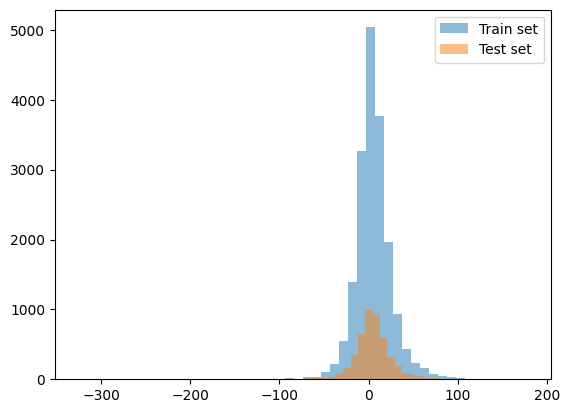

From this histogram, we can observe that the target variable for both Train and Test have similar distributions, indicating that the Test set is representative of the Train set.


In [17]:
import matplotlib.pyplot as plt

# Verify the distribution of the target variable 'Y' on the Train and Test sets
plt.hist(y_train, bins=50, alpha=0.5, label='Train set')
plt.hist(y_test, bins=50, alpha=0.5, label='Test set')
plt.legend()
plt.show()
print("Target variable for both Train and Test sets have similar distributions, indicating that the Test set is representative of the Train set.")

## Train and Test Multiple Models
**We will train and test the following models:**
- Ridge Regression (Linear + Regularization)
- Random Forest Regressor (Ensemble)
- KNeighbors Regressor (Instance-Based)
- SVR (Kernel-Based)

**Future Models to Try Out**
- Gradient Boosting Algorithms (e.g., AdaBoost)


**Metrics used to evaluate model:**

- Mean Squared Error (MSE):
    - Measures the average squared difference between predicted and actual values.

- Mean Absolute Error (MAE):
    - Measures the average absolute difference between predicted and actual values.

- R-Squared (R²):
    - Measures the proportion of variance in the target variable (`y_test`) explained by the model.
    - A value closer to 1 indicates a better fit, while negative values suggest the model is worse than a simple mean prediction.

In [19]:
# Train and Test multiple models
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define models
models = [
    Ridge(random_state=42),                                                  
    RandomForestRegressor(random_state=42, n_jobs=-1),  # n_jobs=-1 ensure all CPU cores are used.
    KNeighborsRegressor(),                              
    SVR()
]

# Initialize metrics list of each model for comparison
metrics_summary = []

# Iterate over models and calculate metrics
for model in models:
    # Indicate the current model being trained
    print(f"Training and Testing model: {model.__class__.__name__}...")

    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Print metrics for the model
    print(f"Model: {model.__class__.__name__}")
    print(f"R2 Score: {test_r2:.4f}")
    print(f"MSE: {test_mse:.4f}")
    print(f"MAE: {test_mae:.4f}")
    print('-' * 30)

    # Store metrics and model name
    metrics_summary.append({
        'model': model.__class__.__name__,
        'r2_score': test_r2,
        'mse': test_mse,
        'mae': test_mae
    })

Training and Testing model: Ridge...
Model: Ridge
R2 Score: -0.1167
MSE: 442.7453
MAE: 15.6770
------------------------------
Training and Testing model: RandomForestRegressor...


KeyboardInterrupt: 

In [7]:
# Determine the best model based on R2 Score (higher is better)
best_model_r2 = max(metrics_summary, key=lambda x: x['r2_score'])

# Optionally, determine the best model based on MSE or MAE (lower is better)
best_model_mse = min(metrics_summary, key=lambda x: x['mse'])
best_model_mae = min(metrics_summary, key=lambda x: x['mae'])

# Print the best models
print(f"Model with best R2 score: {best_model_r2['model']}\nR2 Score: {best_model_r2['r2_score']:.4f}\n")
print(f"Model with best MSE: {best_model_mse['model']}\nMSE: {best_model_mse['mse']:.4f}\n")
print(f"Model with best MAE: {best_model_mae['model']}\nMAE: {best_model_mae['mae']:.4f}")

Model with best R2 score: KNeighborsRegressor
R2 Score: 0.2672

Model with best MSE: KNeighborsRegressor
MSE: 388.4052

Model with best MAE: RandomForestRegressor
MAE: 12.4902


## Cross-Validation

In [8]:
from sklearn.model_selection import cross_val_score

# Initialize lists to store results
r2_scores = []
mse_scores = []

# Iterate through each model
for model in models:
    # R2 scores
    r2 = cross_val_score(estimator=model, X=X_train, y=y_train, cv=5, scoring='r2')
    r2_scores.append(r2.mean())
    print(f"Model: {model.__class__.__name__}, R2 values: {r2}, Mean R2: {r2.mean()}")

    # MSE scores
    mse = cross_val_score(estimator=model, X=X_train, y=y_train, cv=5, scoring='neg_mean_squared_error')
    mse_scores.append(-mse.mean())  # Negate to get positive MSE
    print(f"Model: {model.__class__.__name__}, Negative MSE values: {mse}, Mean MSE: {-mse.mean()}\n")

# Summary of results
print(f"\nSummary of R2 scores: {r2_scores}")
print(f"Summary of MSE: {mse_scores}")

Model: Ridge, R2 values: [0.24033767 0.20492267 0.22762115 0.22068466 0.19283378], Mean R2: 0.2172799849713118
Model: Ridge, Negative MSE values: [-364.71165875 -424.87687566 -399.30378037 -383.05058035 -478.13589633], Mean MSE: 410.0157582910435
Model: RandomForestRegressor, R2 values: [0.2956964  0.25366591 0.29054085 0.23968899 0.21006743], Mean R2: 0.25793191448837893
Model: RandomForestRegressor, Negative MSE values: [-338.13409511 -398.82925093 -366.77560989 -373.7095313  -467.92731092], Mean MSE: 389.07515962776574
Model: KNeighborsRegressor, R2 values: [0.25598179 0.27276844 0.28131966 0.24382136 0.24478589], Mean R2: 0.2597354290816519
Model: KNeighborsRegressor, Negative MSE values: [-357.20096196 -388.62115697 -371.54276858 -371.67838495 -447.36135357], Mean MSE: 387.280925204932
Model: SVR, R2 values: [0.23346734 0.20479118 0.22095106 0.22213775 0.18986043], Mean R2: 0.21424154998168604
Model: SVR, Negative MSE values: [-368.01008503 -424.94714238 -402.75208075 -382.3363536

## Ensemble Voting

In [11]:
from sklearn.ensemble import VotingRegressor

# Models to include in the ensemble
ensemble_model = VotingRegressor(estimators=[
    ("Ridge", Ridge()),
    ("RandomForestRegression", RandomForestRegressor()),
    ("KNeighborsRegressor", KNeighborsRegressor()),
    ("SVR", SVR())
])

# Training the ensemble
ensemble_model.fit(X_train, y_train)

# Perform the predictions using the ensemble
y_pred_ensemble = ensemble_model.predict(X_test)

# Evaluate the ensemble performance and print the results
print(f"Ensemble Results:")
print(f"MSE: {mean_squared_error(y_test, y_pred_ensemble):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_ensemble):.2f}")
print(f"R2: {r2_score(y_test, y_pred_ensemble):.2f}")

Ensemble Results:

MSE: 379.31
MAE: 12.07
R2: 0.28


## Hyperparameter Tuning

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100], 
    'max_depth': [None, 10, 20, 30], 
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4]
    }

grid_search = GridSearchCV(RandomForestRegressor(random_state=42, n_jobs=-1), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_test, y_test)

best_model = grid_search.best_estimator_

best_model.fit(X_train, y_train)
y_pred_rf = best_model.predict(X_test)

# Print the Best Parameters
print(f"Best Parameters: {grid_search.best_params_}")

# Print Best Metrics
print(f"MSE: {mean_squared_error(y_test, y_pred_rf):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred_rf):.2f}")

Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
MSE: 359.75
MAE: 11.73
R2 Score: 0.32
